# Capstone 2: A/B Testing

##Dataset Sources: 
### Sexual Violence in Armed Conflict (SVAC) dataset measures reports of the conflict-related sexual violence committed by armed actors during the years 1989-2015 http://www.sexualviolencedata.org/dataset/
###  https://guides.ucf.edu/war/wardata
###   YRS 1998-2008: https://www.prio.org/Data/Armed-Conflict/Conflict-Site/
### Download Political Instability Task Force Worldwide Atrocities Dataset, January 2016 to February 2020 (.zip) -- less than 10 cases for Yemen
### University of MD, Center for International Development & Conflict Management:  https://www.dropbox.com/sh/g30wur1u0g8bppt/AAA01uvF4hEwYs8OU11wtnbea?dl=0


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### df = pd.read_excel('grokonez.xlsx')  # parameter (sheetname='sheet_name') is optional
### df.to_csv('grokonez.csv', index=False)  # index=True to write row index

### Data Key: http://www.sexualviolencedata.org/wp-content/uploads/2019/10/SVAC-2.0-Coding-Manual-FINAL.pdf

### Background & Variables: 
SAMPLE DURING ACTIVE CONFLICT YEARS:
Syria cases: (2485 - 2474) + (9206-9199) + (9246-9239)= 11+7+7=25
Yemen cases: 625-594= 31
The SVAC Dataset covers conflict-related sexual violence committed by the following types of
armed conflict actors: government/state military, pro-government militias, and rebel/insurgent
forces between 1989-2009 (SVAC 1.0), and government/state military and rebel/insurgent forces
for 2010-2015 (SVAC 2.0). We include only sexual violence by armed groups against individuals
outside their own organization.

All actors listed in the SVAC 2.0 Dataset are involved in state-based conflicts as defined by the
UCDP/PRIO Armed Conflict Database. Peacekeeper and civilian perpetrators are not included as
actors in the dataset. We also do not include non-state actors (both rebel groups and PGMs)
involved in violence that is not part of a conflict with the government.

The original SVAC Dataset covered armed conflict active in the years 1989-2009, as defined by
the UCDP/PRIO Armed Conflict Database. The SVAC 2.0 update adds the years 2010-2015.
Therefore, the SVAC 2.0 Dataset includes all conflicts active in the years 1989-2015. The
additional six-year period includes 92 conflicts in 49 countries that were either active or within five
years of cessation. We collected data for all years of active conflict (defined by 25 battle deaths or
more per year) and for the five years post-conflict. Beyond this post-conflict time period,
“peacetime” sexual violence is outside the scope of the project. We also code “interim” years; see
definition of this variable below. 

Variables
For compatibility and ease of integration with widely used existing datasets, we include a number
of general variables on region, country, year, actor ID, type of actor, and conflict ID mostly from
the UCDP/PRIO data.
We use a monadic conflict-actor-year data structure; we rejected a dyadic structure because many
of the victims of sexual violence in armed conflicts are civilians, which does not lend itself easily
to a dyadic logic. By including variables with dyad ID and conflict ID, however, analysts may
create a dyadic structure. 

Sexual Violence**
Following the definition used by the International Criminal Court (ICC)3, we use a definition of
crimes of sexual violence which includes (1) rape,(2) sexual slavery,(3) forced prostitution,(4)
forced pregnancy, and (5) forced sterilization/abortion. Following Elisabeth Wood (2009), we
also include (6) sexual mutilation, and (7) sexual torture.10 This definition does not exclude the
existence of female perpetrators and male victims. We focus on behaviors that involve direct force
and/or physical violence. We exclude acts that do not go beyond verbal sexual harassment and
abuse, including sexualized insults or verbal humiliation. 

actor_type 
SVAC A coding for the type of actor. More specifically, we employ
the following scheme:
1: State or incumbent government (in UCDP dyadic, this actor type is called 'Side A')
2: State A2 (in UCDP dyadic, this actor type is called 'Side A2nd'). These are states supporting the state (1) involved with conflict on its territory. 
3: Rebel (in UCDP dyadic, the actor type is called 'Side B')
4: State supporting ‘Side B’ in other country (in UCDP dyadic, this actor type is called 'SideB2nd').
5: Second state in interstate conflict (in UCDP dyadic, this actor is called ‘Side B’).
6: Pro-government militias (PGMs)

type 
UCDP/PRIO Nominal variable with three categories:
2: Interstate Conflict
3: Intrastate Conflict
4: Internationalized Internal Armed Conflict

~Syria is both types of conflict: Government & Territory
~Yemen is both types of conflict: Government & Territory

**Sexual Violence Variables
The sexual violence variables aim to capture data on two dimensions, prevalence and form.
(1) Prevalence
The prevalence measure gives an estimate of the relative magnitude of sexual violence perpetration
was by the conflict actor in the particular year. This is coded according to an ordinal scale, adapted
from Cohen (2010; 2016) and discussed in Cohen and Nordås (2014). Note that the coding is
primarily based on the qualitative description; only secondarily do we rely on a count of estimated
incidents. The SVAC dataset cannot be used as a means to estimate the numbers of victims.
Prevalence = 3 (Massive) Sexual violence is likely related to the conflict, and:
• Sexual violence was described as “systematic” or “massive” or “innumerable”
• Actor used sexual violence as a “means of intimidation,” “instrument of control and
punishment,” “weapon,” “tactic to terrorize the population,” “terror tactic,” “tool of war,”
on a “massive scale”
Note: Absent these or similar terms, a count of 1000 or more reports of sexual violence
indicates a prevalence code of 3.
Prevalence = 2 (Numerous) Sexual violence is likely related to the conflict, but did not meet the
requirements for a 3 coding, and:
• Sexual violence was described as “widespread,” “common,” “commonplace,” “extensive,”
“frequent,” “often,” “persistent,” “recurring,” a “pattern,” a “common pattern,” or a “spree”
• Sexual violence occurred “commonly,” “frequently,” “in large numbers,” “periodically,”
“regularly,” “routinely,” “widely,” or on a “number of occasions;” there were “many” or
“numerous instances”
Note: Absent these or similar terms, a count of 25-999 reports of sexual violence indicates a
prevalence code of 2.
Prevalence = 1 (Isolated) Sexual violence is likely related to the conflict, but did not meet the
requirements for a 2 or 3 coding, and:
SVAC 2.0—November 2019 Update 10
• There were “reports,” “isolated reports,” or “there continued to be reports” of occurrences
of sexual violence
Note: Absent these or similar terms, a count of less than 25 reports of sexual violence indicates
a prevalence code of 1.
Prevalence = 0 (None) Report issued, but no mention of rape or other sexual violence related to
the conflict
Note: For example, a coder finds a report covering a country in a given year but within the report
there is no mention of rape or other sexual violence related to the conflict.
Prevalence = -99 (BOTH No Report AND No Information) No report found and no data
available from subsequent years, and consequentially no data. This code should be used as
infrequently as possible.

In [70]:
#Need to convert XLS file to CSV import pandas as pd #Users⁩/⁨mehrunisaqayyum⁩/⁨Downloads/SVAC_2.0_complete_X.1.xlsx⁩',sheet_name=None)
#df_xls.to_csv('SVAC_2.0_complete_X.1.csv'
df_xls = pd.read_excel('http://www.sexualviolencedata.org/wp-content/uploads/2019/12/SVAC_2.0_complete_X.1.xlsx',dtype='object') #encoding='utf-8')

#df.to_csv('SVAC_2.0_complete_X.1.csv', index=False)

In [71]:
df_xls

,year,conflictid_old,conflictid_new,actor,actorid,actorid_new,actor_type,type,incomp,region,...,gwnoloc2,gwnoloc3,gwnoloc4,conflictyear,interm,postc,state_prev,ai_prev,hrw_prev,form
0,1989,6,205,Iran,630,114,1,3,1,2,...,0,0,0,0,1,0,0,0,0,-99
1,1990,6,205,Iran,630,114,1,3,1,2,...,0,0,0,1,0,0,0,0,0,-99
2,1991,6,205,Iran,630,114,1,3,1,2,...,0,0,0,0,1,0,0,0,0,-99
3,1992,6,205,Iran,630,114,1,3,1,2,...,0,0,0,0,1,0,0,0,0,-99
4,1993,6,205,Iran,630,114,1,3,1,2,...,0,0,0,1,0,0,0,0,0,-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9277,2015,298,13694,Libya,620,111,1,3,1,4,...,0,0,0,1,0,0,0,0,1,7
9278,2015,13721,13721,Algeria,615,109,1,3,1,4,...,0,0,0,1,0,0,0,0,0,-99
9279,2015,13721,13721,Jund al-Khilafah,5870,5870,3,3,1,4,...,0,0,0,1,0,0,0,0,0,-99
9280,2015,13902,13902,IS,1076,234,3,3,1,2,...,0,0,0,1,0,0,0,0,0,-99


In [72]:
df['form'].value_counts()

-99.0    8329
 1.0      598
 7.0       70
 2.0       25
 6.0        2
 3.0        2
 5.0        2
Name: form, dtype: int64

In [6]:
df_xls.head()

,year,conflictid_old,conflictid_new,actor,actorid,actorid_new,actor_type,type,incomp,region,...,gwnoloc2,gwnoloc3,gwnoloc4,conflictyear,interm,postc,state_prev,ai_prev,hrw_prev,form
0,1989,6,205,Iran,630,114.0,1,3,1,2,...,0,0,0,0,1,0,0.0,0.0,0.0,-99
1,1990,6,205,Iran,630,114.0,1,3,1,2,...,0,0,0,1,0,0,0.0,0.0,0.0,-99
2,1991,6,205,Iran,630,114.0,1,3,1,2,...,0,0,0,0,1,0,0.0,0.0,0.0,-99
3,1992,6,205,Iran,630,114.0,1,3,1,2,...,0,0,0,0,1,0,0.0,0.0,0.0,-99
4,1993,6,205,Iran,630,114.0,1,3,1,2,...,0,0,0,1,0,0,0.0,0.0,0.0,-99


##HYPOTHESIS: Hypothesis: Countries inhabiting more of this type of actor "" will have higher rates of Form or prevalance of sexual violence against women during government and territorial conflict. #Create a new index: a column that combines both columns (both violence and type). What other possible weak points?  #There's a statistical diff between these two countries with more actors than less actors. #look at population per citizen. Proportion of cases larger than the average. Count of the number of cases. Proportion of cases/population. Cases per person for Syria: is it significantly larger than cases per person in the average of all other cases. Focus across 3 years. 

Null: There will be no difference in Test A (Syria in state) and Test B (rest of world) in rates of Form or prevalance of sexual violence against women during government and territorial conflict.

In [74]:
#Need to change the list into a Pandas dataframe: https://stackoverflow.com/questions/45489205/why-is-df-head-not-working-in-python
df = pd.DataFrame(df_xls)

In [75]:
df.shape

(9282, 22)

In [9]:
index=df.index
index

RangeIndex(start=0, stop=9282, step=1)

In [76]:
columns=df.columns
columns

Index(['year', 'conflictid_old', 'conflictid_new', 'actor', 'actorid',
       'actorid_new', 'actor_type', 'type', 'incomp', 'region', 'location',
       'gwnoloc', 'gwnoloc2', 'gwnoloc3', 'gwnoloc4', 'conflictyear', 'interm',
       'postc', 'state_prev', 'ai_prev', 'hrw_prev', 'form'],
      dtype='object')

In [11]:
#Check for Null Values
sum(df['year'].isnull())
df

,year,conflictid_old,conflictid_new,actor,actorid,actorid_new,actor_type,type,incomp,region,...,gwnoloc2,gwnoloc3,gwnoloc4,conflictyear,interm,postc,state_prev,ai_prev,hrw_prev,form
0,1989,6,205,Iran,630,114.0,1,3,1,2,...,0,0,0,0,1,0,0.0,0.0,0.0,-99
1,1990,6,205,Iran,630,114.0,1,3,1,2,...,0,0,0,1,0,0,0.0,0.0,0.0,-99
2,1991,6,205,Iran,630,114.0,1,3,1,2,...,0,0,0,0,1,0,0.0,0.0,0.0,-99
3,1992,6,205,Iran,630,114.0,1,3,1,2,...,0,0,0,0,1,0,0.0,0.0,0.0,-99
4,1993,6,205,Iran,630,114.0,1,3,1,2,...,0,0,0,1,0,0,0.0,0.0,0.0,-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9277,2015,298,13694,Libya,620,111.0,1,3,1,4,...,0,0,0,1,0,0,0.0,0.0,1.0,7
9278,2015,13721,13721,Algeria,615,109.0,1,3,1,4,...,0,0,0,1,0,0,0.0,0.0,0.0,-99
9279,2015,13721,13721,Jund al-Khilafah,5870,5870.0,3,3,1,4,...,0,0,0,1,0,0,0.0,0.0,0.0,-99
9280,2015,13902,13902,IS,1076,234.0,3,3,1,2,...,0,0,0,1,0,0,0.0,0.0,0.0,-99


In [12]:
sum(df['actor_type'].isnull())

0

In [13]:
sum(df['type'].isnull())

0

In [14]:
sum(df['state_prev'].isnull())

10

In [15]:
sum(df['ai_prev'].isnull())

10

In [16]:
sum(df['hrw_prev'].isnull())

10

In [17]:
sum(df['form'].isnull())

10

## Data Types

In [98]:
df.dtypes
#Note that the variable "form" is an object. Need to transform into numeric for both subsets.

year               object
conflictid_old     object
conflictid_new     object
actor              object
actorid            object
actorid_new        object
actor_type         object
type               object
incomp             object
region             object
location           object
gwnoloc            object
gwnoloc2           object
gwnoloc3           object
gwnoloc4           object
conflictyear       object
interm             object
postc              object
state_prev         object
ai_prev            object
hrw_prev           object
form               object
form_is_pattern     int64
dtype: object

In [99]:
df['type'].value_counts()
#There are 3 types of conflict.

3    5468
4    3486
2     328
Name: type, dtype: int64

In [26]:
df['actor_type'].value_counts()
#There are 6 actor types. '3' is the most prevalent.

3    3020
6    2235
1    1914
2    1613
4     412
5      88
Name: actor_type, dtype: int64

In [102]:
df['form'].value_counts()

-99              8329
1                 598
1, 7              112
7                  70
1, 2               53
1, 2, 7            27
2                  25
1, 6, 7             7
1, 3                4
1, 2, 3, 5          4
1, 3, 5             3
1, 5                3
1, 6                3
1, 2, 6, 7          3
1, 2, 6             3
1, 3, 7             2
1, 5, 7             2
2, 3                2
1, 2                2
6                   2
2, 3, 5             2
5                   2
3                   2
2, 7                1
1, 2, 3             1
1, 2 , 7            1
6, 7                1
1, 2, 3, 5, 7       1
1, 2, 5, 7          1
2, 5, 7             1
1, 5, 6             1
1,7                 1
1, 2, 5,            1
5, 7                1
1, 2, 5             1
Name: form, dtype: int64

In [19]:
df['form'] = pd.to_numeric(df['form'], errors='coerce')
print(df)

      year  conflictid_old  conflictid_new             actor  actorid  \
0     1989               6             205              Iran      630   
1     1990               6             205              Iran      630   
2     1991               6             205              Iran      630   
3     1992               6             205              Iran      630   
4     1993               6             205              Iran      630   
...    ...             ...             ...               ...      ...   
9277  2015             298           13694             Libya      620   
9278  2015           13721           13721           Algeria      615   
9279  2015           13721           13721  Jund al-Khilafah     5870   
9280  2015           13902           13902                IS     1076   
9281  2015           13902           13902            Turkey      640   

      actorid_new  actor_type  type  incomp  region  ... gwnoloc2  gwnoloc3  \
0           114.0           1     3       1 

In [20]:
# Use AFTER recoding the form_as_pattern column. Get column 'form' to take out all commas
#df =df.replace(',','')
#print(df)

      year  conflictid_old  conflictid_new             actor  actorid  \
0     1989               6             205              Iran      630   
1     1990               6             205              Iran      630   
2     1991               6             205              Iran      630   
3     1992               6             205              Iran      630   
4     1993               6             205              Iran      630   
...    ...             ...             ...               ...      ...   
9277  2015             298           13694             Libya      620   
9278  2015           13721           13721           Algeria      615   
9279  2015           13721           13721  Jund al-Khilafah     5870   
9280  2015           13902           13902                IS     1076   
9281  2015           13902           13902            Turkey      640   

      actorid_new  actor_type  type  incomp  region  ... gwnoloc2  gwnoloc3  \
0           114.0           1     3       1 

In [79]:
#Before removing columns and BEFORE assigning '-99' to a '1', need to count all 1,2,3,4,5,6,7 in form and represent as a number great than '1'
df['form'].value_counts()

-99              8329
1                 598
1, 7              112
7                  70
1, 2               53
1, 2, 7            27
2                  25
1, 6, 7             7
1, 3                4
1, 2, 3, 5          4
1, 3, 5             3
1, 5                3
1, 6                3
1, 2, 6, 7          3
1, 2, 6             3
1, 3, 7             2
1, 5, 7             2
2, 3                2
1, 2                2
6                   2
2, 3, 5             2
5                   2
3                   2
2, 7                1
1, 2, 3             1
1, 2 , 7            1
6, 7                1
1, 2, 3, 5, 7       1
1, 2, 5, 7          1
2, 5, 7             1
1, 5, 6             1
1,7                 1
1, 2, 5,            1
5, 7                1
1, 2, 5             1
Name: form, dtype: int64

In [103]:
df.iloc[6522:6525]['form'] 

6522    1, 7
6523       1
6524     -99
Name: form, dtype: object

### Code for 'Form' of Crimes
def a_ton_of_crimes(code_number):
    code_number = str(code_number)
    dict_of_crimes = {}
    for item in code_number:
        if code_number == '1':
            dict_of_crimes['type 1'] = 1
        if code_number == '2':
            dict_of_crimes['type 2'] = 1
        if code_number == '3':
            dict_of_crimes['type 3'] = 1
        if code_number == '4':
            dict_of_crimes['type 4'] = 1
        if code_number == '5':
            dict_of_crimes['type 5'] = 1
        if code_number == '6':
            dict_of_crimes['type 6'] = 1
        if code_number == '7':
            dict_of_crimes['type 7'] = 1
    return dict_of_crimes

In [104]:
def a_ton_of_crimes(code_number):
    code_number = str(code_number)
    dict_of_crimes = {}
    for item in code_number:
        if code_number == '1':
            dict_of_crimes['type 1'] = 1
        if code_number == '2':
            dict_of_crimes['type 2'] = 1
        if code_number == '3':
            dict_of_crimes['type 3'] = 1
        if code_number == '4':
            dict_of_crimes['type 4'] = 1
        if code_number == '5':
            dict_of_crimes['type 5'] = 1
        if code_number == '6':
            dict_of_crimes['type 6'] = 1
        if code_number == '7':
            dict_of_crimes['type 7'] = 1
    return dict_of_crimes
print(a_ton_of_crimes)

<function a_ton_of_crimes at 0x1a2578cd40>


In [85]:
df.iloc[6522:6525]['form'] 

6522    1, 7
6523       1
6524     -99
Name: form, dtype: object

In [105]:
new_df = pd.DataFrame(df['form'].apply(a_ton_of_crimes).tolist())
print(new_df)

TypeError: 'str' object is not callable

In [93]:
df.iloc[6522:6525]['form'] 

6522    1, 7
6523       1
6524     -99
Name: form, dtype: object

In [97]:
str ='1,2,7'
str.split(',')

['1', '2', '7']

In [96]:
df.iloc[6500:7000]['form_is_pattern']

6500    2
6501    2
6502    2
6503    2
6504    2
       ..
6995    2
6996    2
6997    2
6998    2
6999    2
Name: form_is_pattern, Length: 500, dtype: int64

###Alternative Method

In [81]:
#Define a Function where 'form'>1 ; form_is_pattern('form':1,2,3,4,5,6,7):
                  # form_is_pattern includes '-99' or '99'     
#df['form_is_pattern'] = [1 if x ==-99 else 2 for x in df['form']]
#print(df['form_is_pattern'])

0       2
1       2
2       2
3       2
4       2
       ..
9277    2
9278    2
9279    2
9280    2
9281    2
Name: form_is_pattern, Length: 9282, dtype: int64


In [111]:
df['form_is_pattern'].value_counts()

2    9282
Name: form_is_pattern, dtype: int64

In [38]:
#df['form_is_pattern'] = count[] 
df.groupby(["form_is_pattern"]).size()  #same result

form_is_pattern
1    8329
2     953
dtype: int64

In [109]:
df[6522:6535]

,year,conflictid_old,conflictid_new,actor,actorid,actorid_new,actor_type,type,incomp,region,...,gwnoloc3,gwnoloc4,conflictyear,interm,postc,state_prev,ai_prev,hrw_prev,form,form_is_pattern
6522,1993,186,381,Front for the Advancement and Progress of Hait...,6173,6173,6,3,2,5,...,0,0,0,0,1,0,0,1,"1, 7",2
6523,1994,186,381,Front for the Advancement and Progress of Hait...,6173,6173,6,3,2,5,...,0,0,0,0,1,0,1,1,1,2
6524,1995,186,381,Front for the Advancement and Progress of Hait...,6173,6173,6,3,2,5,...,0,0,0,0,1,0,0,0,-99,2
6525,1996,186,381,Front for the Advancement and Progress of Hait...,6173,6173,6,3,2,5,...,0,0,0,0,1,0,0,0,-99,2
6526,1989,186,381,Haiti,41,6,1,3,2,5,...,0,0,1,0,0,0,0,0,-99,2
6527,1990,186,381,Haiti,41,6,1,3,2,5,...,0,0,0,1,0,0,0,-99,-99,2
6528,1991,186,381,Haiti,41,6,1,3,2,5,...,0,0,1,0,0,0,0,0,-99,2
6529,1992,186,381,Haiti,41,6,1,3,2,5,...,0,0,0,0,1,0,0,1,1,2
6530,1993,186,381,Haiti,41,6,1,3,2,5,...,0,0,0,0,1,0,1,1,"1, 5, 7",2
6531,1994,186,381,Haiti,41,6,1,3,2,5,...,0,0,0,0,1,2,2,2,"1, 7",2


In [ ]:
#Alternatively: Need to change 'form' column value of -99 to 1 to calculate new index without eliminating the unreportable score.
#     print(df['form'].str.replace('-99', '1'))

In [ ]:
# Instead, let's define a new function that takes a string as an argument
# and returns True if the string is all digits, otherwise False.

def is_a_digit('form'):
    # First make sure we're operating on a string, then use our string method.
    return str(df['form'].isdigit()

# Now let's apply our custom function to each element in our series.
print(df.apply(is_a_digit))

In [ ]:
np.median(df['actor_type'])
#Actor carrying out violence usually type '3': Rebel (in UCDP dyadic, the actor type is called 'Side B')

In [ ]:
import statistics
statistics.mode(df['actor_type'])
#Actor carrying out violence usually type '3': Rebel (in UCDP dyadic, the actor type is called 'Side B')

In [ ]:
df.describe()

## Missing Data:
### We can see that 19 records are missing from the 'actorid' column -- we don't know which actors are unaccounted for in 19 records/rows. Also, we are missing 10 records in the last 3 columns. 


##Duplicate Data:
###We do not have duplicate columns.

In [ ]:
#built in like .sum() or .count(). For even greater possibilities you can use .aggregate(numpy_function). 
df.groupby('location').count()

In [ ]:
df.groupby('location').sum()

In [ ]:
#Country affected with sexual violence
df.groupby('location').aggregate(np.median)

### We see that there are 10 different 'actor types' and 4 different 'form' sexual violence measured. 

### Need to parse out Syria subset, or 'Group A', aside from the global sample between years 2011-2015. 
Source: https://www.dunderdata.com/blog/selecting-subsets-of-data-in-pandas-part-1 

In [40]:
#Will create 'X' as the subset dropping columns, rows not needed
#The global sample is 'Group B'. Need a second dataframe to organize this group A.
X=df_xls.drop(columns=['conflictid_old'])
X

,year,conflictid_new,actor,actorid,actorid_new,actor_type,type,incomp,region,location,...,gwnoloc2,gwnoloc3,gwnoloc4,conflictyear,interm,postc,state_prev,ai_prev,hrw_prev,form
0,1989,205,Iran,630,114.0,1,3,1,2,Iran,...,0,0,0,0,1,0,0.0,0.0,0.0,-99.0
1,1990,205,Iran,630,114.0,1,3,1,2,Iran,...,0,0,0,1,0,0,0.0,0.0,0.0,-99.0
2,1991,205,Iran,630,114.0,1,3,1,2,Iran,...,0,0,0,0,1,0,0.0,0.0,0.0,-99.0
3,1992,205,Iran,630,114.0,1,3,1,2,Iran,...,0,0,0,0,1,0,0.0,0.0,0.0,-99.0
4,1993,205,Iran,630,114.0,1,3,1,2,Iran,...,0,0,0,1,0,0,0.0,0.0,0.0,-99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9277,2015,13694,Libya,620,111.0,1,3,1,4,Libya,...,0,0,0,1,0,0,0.0,0.0,1.0,7.0
9278,2015,13721,Algeria,615,109.0,1,3,1,4,Algeria,...,0,0,0,1,0,0,0.0,0.0,0.0,-99.0
9279,2015,13721,Jund al-Khilafah,5870,5870.0,3,3,1,4,Algeria,...,0,0,0,1,0,0,0.0,0.0,0.0,-99.0
9280,2015,13902,IS,1076,234.0,3,3,1,2,Turkey,...,0,0,0,1,0,0,0.0,0.0,0.0,-99.0


###Variables of interest/Metrics: 
1) 'year' = Year of conflict                                      2) 'conflictyear' = Dummy variable
3)'actor_type' = Actor carrying out violence: state (A), rebel group (B), Outside party supporting (A), Outside party supporting (B)
4)'type'= Type of conflict                                        5) 'conflictid_new' = Updated conflict data; 
6)'Location' = Country of conflict (Note: different from column where they could be an actor in another conflict)
7) 'Prevalence'= Rate of Sexual Violence, Ordinal Variable        8)'Form'= Type of Sexual Violence, Nominal Variable

##Group A-Syria vs. Group B-World

In [112]:
#Create a subset 
#Need only Syria rows
df_Syria = df[['year','conflictid_new','actor_type','type','location','state_prev','ai_prev','hrw_prev','form','form_is_pattern']]
df_Syria

,year,conflictid_new,actor_type,type,location,state_prev,ai_prev,hrw_prev,form,form_is_pattern
0,1989,205,1,3,Iran,0,0,0,-99,2
1,1990,205,1,3,Iran,0,0,0,-99,2
2,1991,205,1,3,Iran,0,0,0,-99,2
3,1992,205,1,3,Iran,0,0,0,-99,2
4,1993,205,1,3,Iran,0,0,0,-99,2
...,...,...,...,...,...,...,...,...,...,...
9277,2015,13694,1,3,Libya,0,0,1,7,2
9278,2015,13721,1,3,Algeria,0,0,0,-99,2
9279,2015,13721,3,3,Algeria,0,0,0,-99,2
9280,2015,13902,3,3,Turkey,0,0,0,-99,2


In [107]:
df_Syria.loc['2011':'2015']
#df_Syria.loc['location' = Syria]
df_Syria

,year,conflictid_new,actor_type,type,location,state_prev,ai_prev,hrw_prev,form,form_is_pattern
0,1989,205,1,3,Iran,0,0,0,-99,2
1,1990,205,1,3,Iran,0,0,0,-99,2
2,1991,205,1,3,Iran,0,0,0,-99,2
3,1992,205,1,3,Iran,0,0,0,-99,2
4,1993,205,1,3,Iran,0,0,0,-99,2
...,...,...,...,...,...,...,...,...,...,...
9277,2015,13694,1,3,Libya,0,0,1,7,2
9278,2015,13721,1,3,Algeria,0,0,0,-99,2
9279,2015,13721,3,3,Algeria,0,0,0,-99,2
9280,2015,13902,3,3,Turkey,0,0,0,-99,2


## Syria Subset 3/15

In [113]:
#Select from 'year' between 2011 and 2017 AND location of Syria index
df_Syria = df[(df['year'] >= 2011) & (df['year'] <= 2017) & (df['location'] == 'Syria')]
df_Syria

,year,conflictid_old,conflictid_new,actor,actorid,actorid_new,actor_type,type,incomp,region,...,gwnoloc3,gwnoloc4,conflictyear,interm,postc,state_prev,ai_prev,hrw_prev,form,form_is_pattern
2472,2015,102,299,Iran,630,114,2,4,2,2,...,0,0,1,0,0,0,0,0,-99,2
2473,2015,102,299,Russia (Soviet Union),365,57,2,4,2,2,...,0,0,1,0,0,0,0,0,-99,2
2474,2011,102,299,Syria,652,118,1,3,2,2,...,0,0,1,0,0,2,2,1,"1, 6, 7",2
2475,2012,102,299,Syria,652,118,1,3,2,2,...,0,0,1,0,0,3,2,1,"1, 6, 7",2
2476,2013,102,299,Syria,652,118,1,3,2,2,...,0,0,1,0,0,3,2,1,"1, 7",2
2477,2014,102,299,Syria,652,118,1,3,2,2,...,0,0,1,0,0,3,2,0,"1, 7",2
2478,2015,102,299,Syria,652,118,1,4,2,2,...,0,0,1,0,0,3,2,2,"1, 7",2
2479,2011,102,299,Syrian insurgents,4456,4456,3,3,2,2,...,0,0,1,0,0,0,0,0,-99,2
2480,2012,102,299,Syrian insurgents,4456,4456,3,3,2,2,...,0,0,1,0,0,0,0,0,-99,2
2481,2013,102,299,Syrian insurgents,4456,4456,3,3,2,2,...,0,0,1,0,0,0,0,0,-99,2


In [59]:
df_Syria['form'].value_counts()

-99.0    8329
 1.0      598
 7.0       70
 2.0       25
 6.0        2
 3.0        2
 5.0        2
Name: form, dtype: int64

## Use in new Sex_Violence column df['form'].value_counts()

In [45]:
df_Syria[-40:]

,year,conflictid_new,actor_type,type,location,state_prev,ai_prev,hrw_prev,form,form_is_pattern
9242,2013,13604,1,3,Syria,3.0,0.0,0.0,1.0,2
9243,2014,13604,1,3,Syria,3.0,0.0,0.0,1.0,2
9244,2015,13604,1,4,Syria,3.0,0.0,0.0,1.0,2
9245,2015,13611,3,3,Mali,0.0,0.0,1.0,1.0,2
9246,2015,13611,1,3,Mali,0.0,0.0,0.0,-99.0,1
9247,2015,13637,1,4,Afghanistan,0.0,0.0,0.0,-99.0,1
9248,2015,13637,3,4,Afghanistan,0.0,0.0,0.0,-99.0,1
9249,2015,13637,2,4,Afghanistan,0.0,0.0,0.0,-99.0,1
9250,2015,13637,2,4,Afghanistan,0.0,0.0,0.0,-99.0,1
9251,2015,13638,1,4,Cameroon,0.0,0.0,-99.0,-99.0,1


### Sexual Violence Index

In [ ]:
#Create a column that combines the 2 dimensions of sexual violence: Prevalence and Form
#Need to convert 'form' to integar
df_Syria[int()]

### crime_count Option

In [ ]:
df_Syria['sex_violence']=(df['state_prev']+df['ai_prev']+df['hrw_prev']) * df['crime_count'] #df['form_is_pattern']
df_Syria

### 'Form'

In [114]:
df_Syria['sex_violence'] = (df['state_prev']+df['ai_prev']+df['hrw_prev']) *(df['form'].value_counts())
print('sex_violence')

sex_violence


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#Summary stats for Group A
df_Syria.describe()

In [65]:
#Group B
df_world = df[(df['year'] >= 2011) & (df['year'] <= 2017) & (df['location'] != 'Syria')]
df_world

,year,conflictid_old,conflictid_new,actor,actorid,actorid_new,actor_type,type,incomp,region,...,gwnoloc3,gwnoloc4,conflictyear,interm,postc,state_prev,ai_prev,hrw_prev,form,form_is_pattern
69,2011,10,209,CPP,1010,169.0,3,3,2,3,...,0,0,1,0,0,0.0,0.0,0.0,-99.0,1
70,2012,10,209,CPP,1010,169.0,3,3,2,3,...,0,0,1,0,0,0.0,0.0,0.0,-99.0,1
71,2013,10,209,CPP,1010,169.0,3,3,2,3,...,0,0,1,0,0,0.0,-99.0,0.0,-99.0,1
72,2014,10,209,CPP,1010,169.0,3,3,2,3,...,0,0,1,0,0,0.0,0.0,0.0,-99.0,1
73,2015,10,209,CPP,1010,169.0,3,3,2,3,...,0,0,1,0,0,0.0,0.0,0.0,-99.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9277,2015,298,13694,Libya,620,111.0,1,3,1,4,...,0,0,1,0,0,0.0,0.0,1.0,7.0,2
9278,2015,13721,13721,Algeria,615,109.0,1,3,1,4,...,0,0,1,0,0,0.0,0.0,0.0,-99.0,1
9279,2015,13721,13721,Jund al-Khilafah,5870,5870.0,3,3,1,4,...,0,0,1,0,0,0.0,0.0,0.0,-99.0,1
9280,2015,13902,13902,IS,1076,234.0,3,3,1,2,...,0,0,1,0,0,0.0,0.0,0.0,-99.0,1


In [66]:
#Summary stats for Group B
df_world.describe()

,year,conflictid_old,conflictid_new,actorid,actorid_new,actor_type,type,incomp,region,gwnoloc,...,gwnoloc3,gwnoloc4,conflictyear,interm,postc,state_prev,ai_prev,hrw_prev,form,form_is_pattern
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,...,1573.0,1573.0,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1514.000000,1573.000000
mean,2013.226319,224.171011,2549.064209,962.738080,464.009536,2.203433,3.541004,1.697394,3.314685,576.890019,...,0.0,0.0,0.602034,0.045772,0.351558,-2.945327,-8.735537,-5.029243,-92.783355,1.096631
std,1.433299,907.115838,4557.320969,989.553121,1042.797268,0.811378,0.533010,0.459532,0.897137,175.049048,...,0.0,0.0,0.489634,0.209058,0.477608,17.237661,28.225014,21.905427,24.314868,0.295548
min,2011.000000,10.000000,209.000000,2.000000,3.000000,1.000000,2.000000,1.000000,1.000000,2.000000,...,0.0,0.0,0.000000,0.000000,0.000000,-99.000000,-99.000000,-99.000000,-99.000000,1.000000
25%,2012.000000,113.000000,309.000000,380.000000,66.000000,2.000000,3.000000,1.000000,3.000000,437.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,1.000000
50%,2013.000000,141.000000,337.000000,666.000000,122.000000,2.000000,4.000000,2.000000,3.000000,626.000000,...,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,1.000000
75%,2015.000000,225.000000,419.000000,1169.000000,343.000000,3.000000,4.000000,2.000000,4.000000,700.000000,...,0.0,0.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-99.000000,1.000000
max,2015.000000,13902.000000,13902.000000,6712.000000,6712.000000,5.000000,4.000000,2.000000,5.000000,840.000000,...,0.0,0.0,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,7.000000,2.000000


In [67]:
df_world['sex_violence'] =df['state_prev']+df['ai_prev']+df['hrw_prev'] #* df['form_is_pattern']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1, 'Type of Conflict With Actor Intervention')

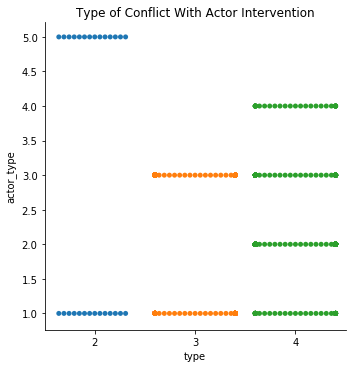

In [68]:
sns.catplot(x="type", y="actor_type", kind="swarm", data=df_world)
plt.title('Type of Conflict With Actor Intervention')

Group C: Yemen Case

In [ ]:
#Would this be an A/A testing if I used a similar conflict zone case, like Yemen?
df_Yemen = df[(df['year'] >= 2011) & (df['year'] <= 2017) & (df['location'] == 'Yemen')]
df_Yemen

##
No data provided for Yemen. Something to look at for future study.